   # What Make Us Smile: World Happiness Data at a Glance

What is the factor that most influence the level of happiness?

  - **Hipotesis**: GDP is the factor that most affect the level of happiness.
  - **Nullhipotesis**: GDP is not related to the happiness level.

*Bakground: The happiness score ranking use data from theGallup World Poll. The scores are based on answers to different factors including GDP, freedom,family, social support and others. There are over 150 countries in this dataset, ranging from 2015 to 2020. For our analysis, we only include 2018-2020 since these three years have similar traits.*

source: https://www.kaggle.com/mathurinache/world-happiness-report?select=2015.csv

### 1. Cleaning process

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import csv

In [2]:
#The path to the CSV file
file_2018 = "Resources/2018.csv"
file_2019 = "Resources/2019.csv"
file_2020 = "Resources/2020.csv"

In [3]:
# Read the files
df_2018 = pd.read_csv(file_2018)
df_2019 = pd.read_csv(file_2019)
df_2020 = pd.read_csv(file_2020)

In [4]:
# visualizate the data

df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [5]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [7]:
# Rename ladder score column 
clean_df_2020 = df_2020.rename(columns={"Ladder score":"Happiness Score", "Logged GDP per capita":"GDP per capita"})

# Drop unnecesary columns


clean_df_2020 = clean_df_2020[["Country name", "Regional indicator", "Happiness Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity"]]

In [8]:
clean_df_2020

,Country name,Regional indicator,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533
...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519


In [15]:
# Narrow down the range of countries (Western Europe vs Northern America)

region_df_2020 = clean_df_2020.loc[(clean_df_2020["Regional indicator"]=="Western Europe") | (clean_df_2020["Regional indicator"]=="North America and ANZ")]

# Reset the index
region_df_2020 = region_df_2020.reset_index(drop=True)

In [25]:
# Western Europe df
we_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="Western Europe")]

In [33]:
# Latin American and Caribbean
lac_df = clean_df_2020.loc[(clean_df_2020["Regional indicator"]=="Latin America and Caribbean")]

In [26]:
# Northern America df
na_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="North America and ANZ")]

In [17]:
# Look for null values
region_df_2020.count()

Country name                    25
Regional indicator              25
Happiness Score                 25
GDP per capita                  25
Social support                  25
Healthy life expectancy         25
Freedom to make life choices    25
Generosity                      25
dtype: int64

### 2. Data visualization

In [18]:
# Describe the data
region_df_2020.describe()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.943108,10.691845,0.916447,72.753725,0.863322,0.058964
std,0.634588,0.286427,0.044114,1.170759,0.099080,0.143986
min,5.515000,10.132326,0.805996,68.299500,0.541345,-0.300907
25%,6.663800,10.500943,0.906912,72.300919,0.825468,-0.043461
50%,7.164500,10.692369,0.928046,72.600769,0.899989,0.085429
75%,7.353500,10.774001,0.942847,73.601685,0.933913,0.149892
max,7.808700,11.450681,0.974670,74.402710,0.955750,0.263732


1.1 What kind of relationship between the happiness rate and the variables?


## The solution: ANOVA - are any of the variables significantly different than the rest?

In [35]:
# What is the correlation level between the variables and the happiness rank?
def happiness(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values, c="royalblue", edgecolor="black")
    plt.plot(x_values, regress_values,"springgreen")
    plt.xlabel("Happiness Score")
    plt.ylabel(y_values.name)
    plt.show()
    print(line_eq)
    print(f"The r-value is: {rvalue}")

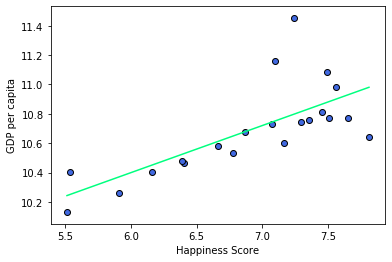

y =0.32x +8.47
The r-value is: 0.7169122287432896


In [36]:
happiness(we_df["Happiness Score"], we_df["GDP per capita"])

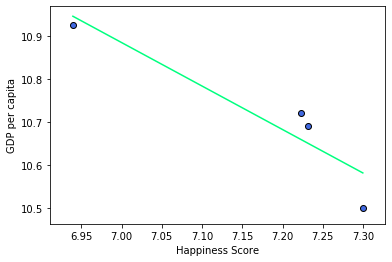

y =-1.01x +17.96
The r-value is: -0.928722874884063


In [37]:
happiness(na_df["Happiness Score"], na_df["GDP per capita"])

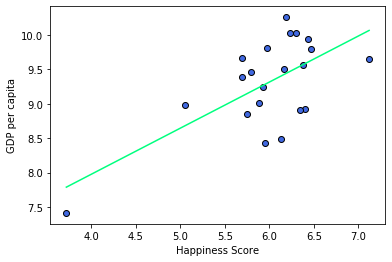

y =0.67x +5.29
The r-value is: 0.6598592515021994


In [34]:
happiness_test(lac_df["Happiness Score"], lac_df["GDP per capita"])

In [51]:
corr_lac =lac_df.corr(method="pearson", min_periods=21)
corr_lac.style.background_gradient(cmap='coolwarm')


,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Happiness Score,1.000000,0.659859,0.686113,0.785693,0.817212,-0.628030
GDP per capita,0.659859,1.000000,0.793414,0.655924,0.480838,-0.696882
Social support,0.686113,0.793414,1.000000,0.759718,0.575107,-0.738101
Healthy life expectancy,0.785693,0.655924,0.759718,1.000000,0.579839,-0.766815
Freedom to make life choices,0.817212,0.480838,0.575107,0.579839,1.000000,-0.485188
Generosity,-0.628030,-0.696882,-0.738101,-0.766815,-0.485188,1.000000


In [46]:
corr = we_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Happiness Score,1.000000,0.716912,0.856354,-0.282501,0.772881,0.620260
GDP per capita,0.716912,1.000000,0.564032,-0.113119,0.615023,0.492734
Social support,0.856354,0.564032,1.000000,-0.196009,0.713431,0.525462
Healthy life expectancy,-0.282501,-0.113119,-0.196009,1.000000,-0.256588,-0.094877
Freedom to make life choices,0.772881,0.615023,0.713431,-0.256588,1.000000,0.603077
Generosity,0.620260,0.492734,0.525462,-0.094877,0.603077,1.000000


1.2  Do the variables have the same level for the happiest countries?

In [ ]:
# Visualize the different variables for the group of countries through the period time (2018-2020)


### 3. Conclusions